Import libraries

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1234)

In [2]:
def Main(sampleMean_, sampleScale_,theoreticalMean_, theoreticalScale_,tlt_):
    # draw sample
    sampleTemp = np.random.normal(loc=sampleMean_, scale=sampleScale_, size=1000)
    # remove duplicates
    sample = np.unique(sampleTemp)
    # sort sample
    sample = np.sort(sample)
    # calculate quantiles corresponding to sample
    quantilesLoc = SampleQuantiles(sample,theoreticalMean_,theoreticalScale_)
    # compare distribution quantiles with data
    PlotQQ(sample, quantilesLoc, theoreticalMean_, 
           theoreticalScale_, R2(sample, quantilesLoc),tlt_)

In [3]:
def SampleQuantiles(sample_,theoreticalMean_,theoreticalScale_):
    # calculate quantiles corresponding to sample
    quantileArea = 1. / (sample_.shape[0] + 1)
    quantiles = np.cumsum(np.ones(sample_.shape[0]) * quantileArea)
    quantilesLoc = norm.ppf(quantiles, loc=theoreticalMean_, scale=theoreticalScale_)
    return quantilesLoc

In [4]:
def R2(sampleTemp, quantilesLocTemp):
    # sum of squared errors of the model
    sse = np.sum(np.square(sampleTemp - quantilesLocTemp))
    # total of squared errors of the model
    sst = np.sum(np.square(sampleTemp- np.mean(sampleTemp)))
    # coefficient of determination
    r2 = 1. - (sse / sst)
    return r2

In [5]:
def PlotQQ(sample_, quantilesLoc_, theoreticalMean_, theoreticalScale_, r2_,tlt):
    import matplotlib
    matplotlib.rcParams['font.size'] = 20
    # QQ plot
    figQQ, axQQ_ = plt.subplots(nrows=1, ncols=2, figsize=[15,7.5])
    axQQ=axQQ_.ravel()
    axQQ[0].scatter(x=quantilesLoc_, y=sample_, label='Sample')
    axQQ[0].plot(quantilesLoc_, quantilesLoc_, label='Theoretically expected', color='red')
    axQQ[0].set_xlabel('Theoretical Quantiles')
    axQQ[0].set_ylabel('Sample Quantiles')
    axQQ[0].text(0.8, 0.1, '$R^2 = {:.3f}$'.format(r2_), ha='center', va='center',
              fontdict={'fontname': 'Arial', 'size': '20', 'color': 'black', 'weight': 'normal'},
              transform=axQQ[0].transAxes)
    x=np.linspace(sample_.min(),sample_.max(),num=100)
    axQQ[1].plot(x,norm.pdf(x,loc=theoreticalMean_, scale=theoreticalScale_))
    axQQ[1].hist(sample_, normed=True)
    axQQ[0].axis('scaled')
    figQQ.suptitle(tlt)
    axQQ[0].legend(loc='upper left',prop={'size': 16})    
    plt.show()

Sample matches theoretical distribution

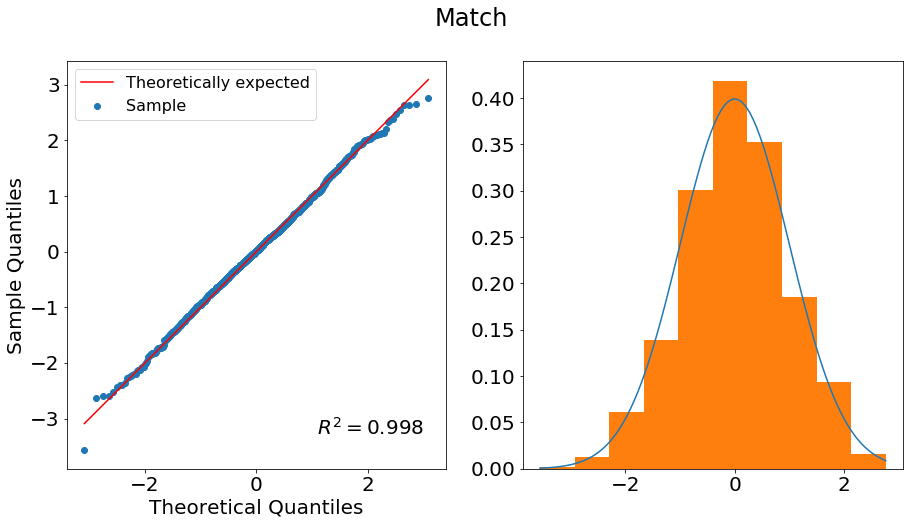

In [6]:
sampleMean, sampleScale = 0, 1
theoreticalMean, theoreticalScale = 0, 1
Main(sampleMean, sampleScale,theoreticalMean, theoreticalScale,'Match')

Sample shifted 

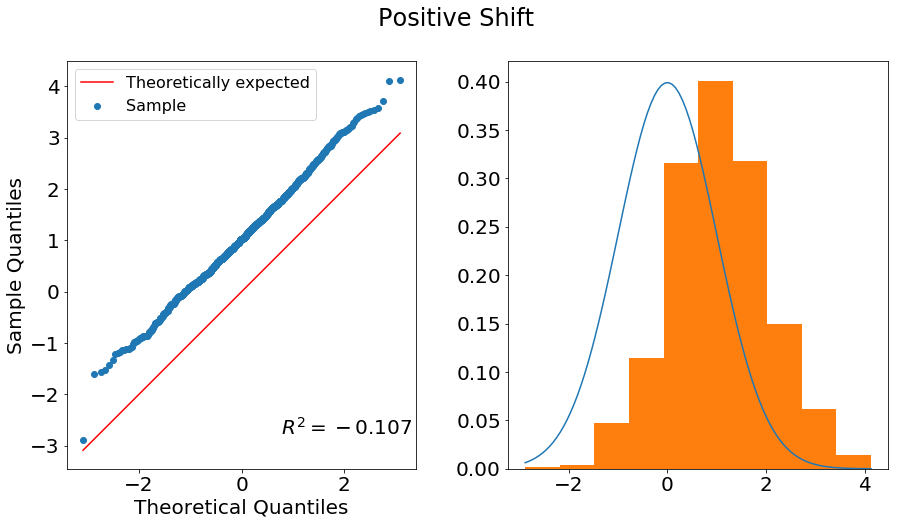

In [7]:
sampleMean, sampleScale = 1, 1
theoreticalMean, theoreticalScale = 0, 1
Main(sampleMean, sampleScale,theoreticalMean, theoreticalScale,'Positive Shift')

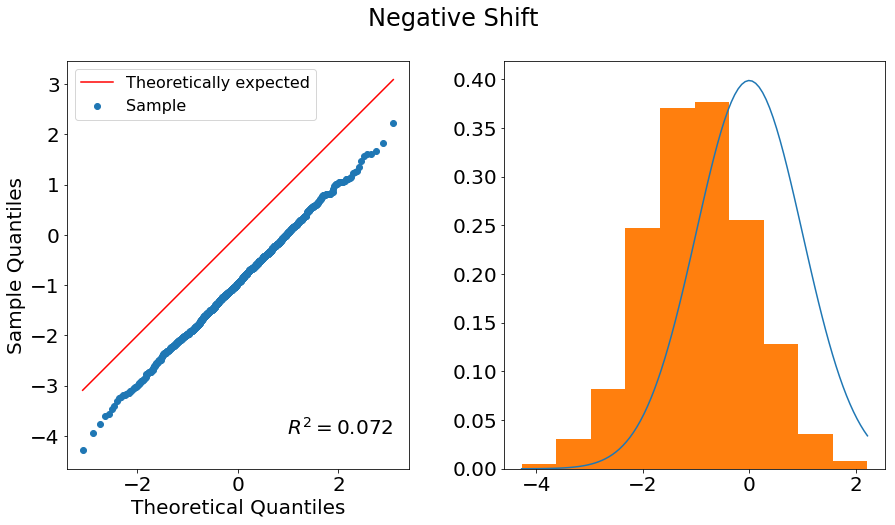

In [8]:
sampleMean, sampleScale = -1, 1
theoreticalMean, theoreticalScale = 0, 1
Main(sampleMean, sampleScale,theoreticalMean, theoreticalScale,'Negative Shift')

Sample narrow tails

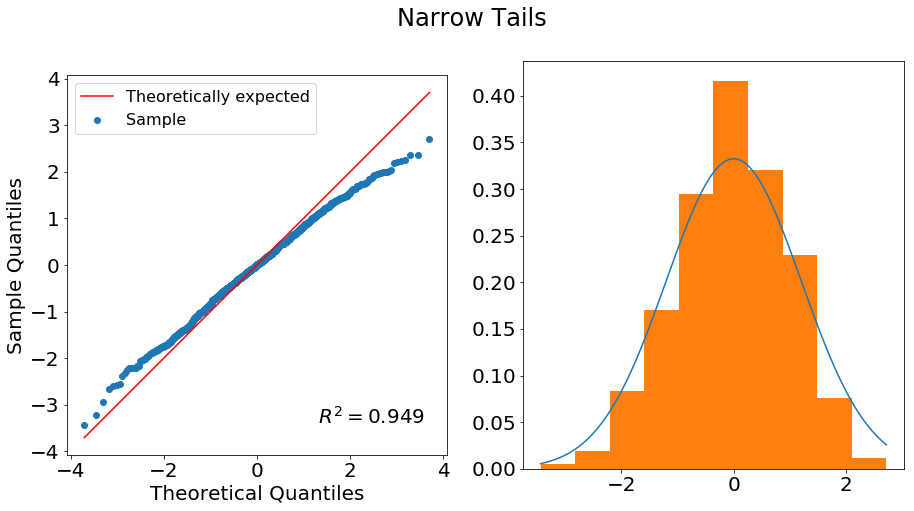

In [9]:
sampleMean, sampleScale = 0, 1
theoreticalMean, theoreticalScale = 0, 1.2
Main(sampleMean, sampleScale,theoreticalMean, theoreticalScale,'Narrow Tails')

Sample fat tails

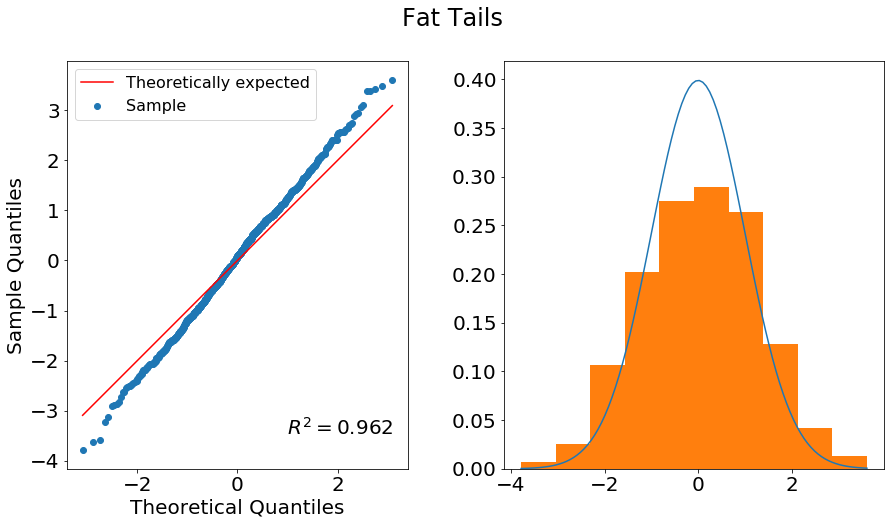

In [10]:
sampleMean, sampleScale = 0, 1.2
theoreticalMean, theoreticalScale = 0, 1
Main(sampleMean, sampleScale,theoreticalMean, theoreticalScale,'Fat Tails')